<a href="https://colab.research.google.com/github/tauqueerdanish/Dogs_vs_Cats/blob/main/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tauqueerdanish","key":"956b8bd1d083a0548f52fa3c8ecb222e"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=d21bdec55dddf5266a8d5130457c81193bd542f0068fb29207f0493b880af4a1
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
! kaggle competitions download -c dogs-vs-cats

 99% 807M/812M [00:08<00:00, 116MB/s]
100% 812M/812M [00:08<00:00, 105MB/s]


In [ ]:
! unzip dogs-vs-cats.zip -d Original_Data

Archive:  dogs-vs-cats.zip
  inflating: Original_Data/sampleSubmission.csv  
  inflating: Original_Data/test1.zip  
  inflating: Original_Data/train.zip  


In [ ]:
! unzip /content/Original_Data/train.zip -d all_images
! unzip /content/Original_Data/test1.zip -d all_images

Streaming output truncated to the last 5000 lines.
  inflating: all_images/test1/5499.jpg  
  inflating: all_images/test1/55.jpg  
  inflating: all_images/test1/550.jpg  
  inflating: all_images/test1/5500.jpg  
  inflating: all_images/test1/5501.jpg  
  inflating: all_images/test1/5502.jpg  
  inflating: all_images/test1/5503.jpg  
  inflating: all_images/test1/5504.jpg  
  inflating: all_images/test1/5505.jpg  
  inflating: all_images/test1/5506.jpg  
  inflating: all_images/test1/5507.jpg  
  inflating: all_images/test1/5508.jpg  
  inflating: all_images/test1/5509.jpg  
  inflating: all_images/test1/551.jpg  
  inflating: all_images/test1/5510.jpg  
  inflating: all_images/test1/5511.jpg  
  inflating: all_images/test1/5512.jpg  
  inflating: all_images/test1/5513.jpg  
  inflating: all_images/test1/5514.jpg  
  inflating: all_images/test1/5515.jpg  
  inflating: all_images/test1/5516.jpg  
  inflating: all_images/test1/5517.jpg  
  inflating: all_images/test1/5518.jpg  
  inflatin

In [2]:
import os, shutil
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, optimizers

In [ ]:
original_data = "/content/all_images/train"
base_dir = "/content/drive/MyDrive/cats_and_dogs_small"
os.mkdir(base_dir)

FileExistsError: ignored

In [ ]:
# Making three directories in the cats and dogs small dataset
train_dir = os.path.join(base_dir,"train")
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,"validation")
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, "test")
os.mkdir(test_dir)

FileExistsError: ignored

In [ ]:
def make_dir(parent_dir,child_dir):
  path = os.path.join(parent_dir,child_dir)
  os.mkdir(path)
  return path

In [ ]:
train_cats_dir = make_dir(train_dir, "cats")

FileExistsError: ignored

In [ ]:
train_cats_dir

NameError: ignored

In [ ]:
train_dogs_dir = make_dir(train_dir,"dogs")
validation_cats_dir = make_dir(validation_dir,"cats")
validation_dogs_dir = make_dir(validation_dir, "dogs")
test_cats_dir = make_dir(test_dir, "cats")
test_dogs_dir = make_dir(test_dir,"dogs")

FileExistsError: ignored

In [ ]:
def copy_image(state,folder,start,end):
  fnames = [state+".{}.jpg".format(i) for i in range (start,end)]
  for fname in fnames:
    src = os.path.join(original_data,fname)
    dst = os.path.join(folder,fname)
    shutil.copyfile(src,dst)

In [ ]:
#Now copy all images from one folder to different folders
copy_image("cat",train_cats_dir,0,1000)
copy_image("dog",train_dogs_dir,0,1000)
copy_image("cat",test_cats_dir,1000,1500)
copy_image("dog",test_dogs_dir,1000,1500)
copy_image("cat",validation_cats_dir,1500,2000)
copy_image("dog",validation_dogs_dir,1500,2000)

NameError: ignored

In [ ]:
print("Total training cat images: ",len(os.listdir(train_cats_dir)))
print("Total training dog images: ",len(os.listdir(train_dogs_dir)))
print("Total test cat images: ",len(os.listdir(test_cats_dir)))
print("Total test dog images: ",len(os.listdir(test_dogs_dir)))
print("Total validation cat images: ",len(os.listdir(validation_cats_dir)))
print("Total validation dog images: ",len(os.listdir(validation_dogs_dir)))

In [ ]:
#from keras import layers
#from keras import models

model  = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation  = "sigmoid"))

In [ ]:
model.summary()

In [ ]:
#from keras import optimizers
model.compile(loss = "binary_crossentropy",
              optimizer = ("rmsprop"),
              metrics= ["acc"])

In [5]:
#Rescale all images by 1/255
#from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
# Resize all images to (150,150)
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/cats_and_dogs_small/train",
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode="binary")
validation_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/cats_and_dogs_small/test",
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch,labels_batch in train_generator:
  print("Data batch shape:", data_batch.shape)
  print("Labels batch shape:", labels_batch.shape)
  break

Data batch shape: (20, 150, 150, 3)
Labels batch shape: (20,)


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 108s 1s/step - loss: 0.7225 - acc: 0.5050 - val_loss: 0.6910 - val_acc: 0.5220
Epoch 2/30
100/100 [==============================] - 106s 1s/step - loss: 0.7300 - acc: 0.5625 - val_loss: 0.6334 - val_acc: 0.6500
Epoch 3/30
100/100 [==============================] - 105s 1s/step - loss: 0.6592 - acc: 0.6335 - val_loss: 0.6333 - val_acc: 0.6370
Epoch 4/30
100/100 [==============================] - 105s 1s/step - loss: 0.6239 - acc: 0.6835 - val_loss: 0.6029 - val_acc: 0.6880
Epoch 5/30
100/100 [==============================] - 105s 1s/step - loss: 0.5524 - acc: 0.7310 - val_loss: 0.6752 - val_acc: 0.6700
Epoch 6/30
100/100 [==============================] - 105s 1s/step - loss: 0.5065 - acc: 0.7475 - val_loss: 0.6202 - val_acc: 0.6940
Epoch 7/30
100/100 [==============================] - 105s 1s/step - loss: 0.4579 - acc: 0.7770 - val_loss: 0.6027 - val_acc: 0.7290
Epoch 8/30
100/100 [==============================] - 106s 1s/step - 

In [ ]:
model.save("cats_and_dogs_small_1.h5")

In [ ]:
history.history

{'acc': [0.5049999952316284,
  0.5625,
  0.6334999799728394,
  0.6834999918937683,
  0.7310000061988831,
  0.7475000023841858,
  0.7770000100135803,
  0.8144999742507935,
  0.8554999828338623,
  0.8815000057220459,
  0.9075000286102295,
  0.9269999861717224,
  0.9484999775886536,
  0.9599999785423279,
  0.9664999842643738,
  0.9714999794960022,
  0.9674999713897705,
  0.9769999980926514,
  0.9760000109672546,
  0.9789999723434448,
  0.9894999861717224,
  0.9865000247955322,
  0.9879999756813049,
  0.9829999804496765,
  0.9860000014305115,
  0.9865000247955322,
  0.987500011920929,
  0.9854999780654907,
  0.9879999756813049,
  0.984499990940094],
 'loss': [0.722504734992981,
  0.7299984097480774,
  0.6591665744781494,
  0.6239375472068787,
  0.5524089932441711,
  0.5065499544143677,
  0.45793259143829346,
  0.41465529799461365,
  0.3370230495929718,
  0.28392380475997925,
  0.23327109217643738,
  0.1779802143573761,
  0.1435261070728302,
  0.12343903630971909,
  0.10482534021139145,
  0

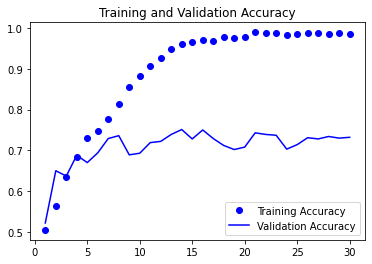

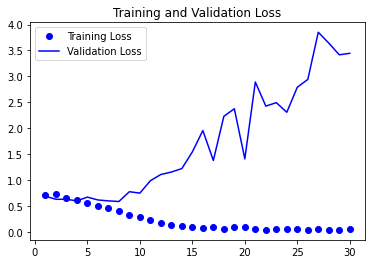

In [ ]:
#import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,"bo", label = "Training Accuracy")
plt.plot(epochs,val_acc,"b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()


plt.plot(epochs,loss,"bo", label= "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

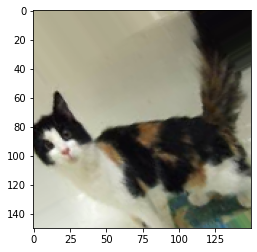

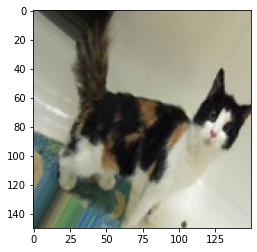

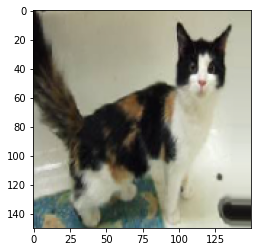

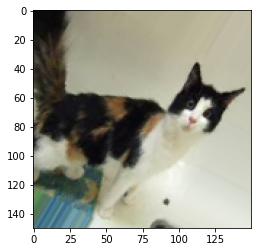

In [ ]:
#from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path,target_size= (150,150))
x = image.img_to_array(img)
x = x.reshape((1,)+ x.shape)

i = 0
for  batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i%4 == 0:
    break

plt.show()

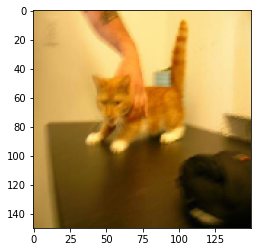

In [ ]:
# How we load images and show
test = image.load_img(fnames[5], target_size=(150,150))
imgsh = plt.imshow(test)
plt.show()

In [ ]:
# Now cerate a model with the dropout layer which help us to fight the ovrfitting

model  = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
# This dropout layer is just adding in the previous model
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation  = "sigmoid"))

In [ ]:
# Now training the model with the data augmentation generators
train_datagen = ImageDataGenerator(
    rescale= (1./255),
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = (1./255))

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode= "binary")

validation_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size = (150,150),
                                                        batch_size = 20,
                                                        class_mode = "binary"
                                                        )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model.compile(loss = "binary_crossentropy",
              optimizer = ("rmsprop"),
              metrics= ["acc"])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 116s 1s/step - loss: 0.7006 - acc: 0.5155 - val_loss: 0.6970 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 114s 1s/step - loss: 0.7019 - acc: 0.5390 - val_loss: 0.6793 - val_acc: 0.5510
Epoch 3/100
100/100 [==============================] - 114s 1s/step - loss: 0.6838 - acc: 0.5875 - val_loss: 0.7007 - val_acc: 0.5450
Epoch 4/100
100/100 [==============================] - 114s 1s/step - loss: 0.6735 - acc: 0.5905 - val_loss: 0.6640 - val_acc: 0.6110
Epoch 5/100
100/100 [==============================] - 115s 1s/step - loss: 0.6566 - acc: 0.6285 - val_loss: 0.6583 - val_acc: 0.6390
Epoch 6/100
100/100 [==============================] - 115s 1s/step - loss: 0.6475 - acc: 0.6440 - val_loss: 0.6431 - val_acc: 0.6570
Epoch 7/100
100/100 [==============================] - 114s 1s/step - loss: 0.6455 - acc: 0.6460 - val_loss: 0.6060 - val_acc: 0.7030
Epoch 8/100
100/100 [==============================] - 115s 1s

In [ ]:
model.save("cats_and_dogs_small_2.h5")

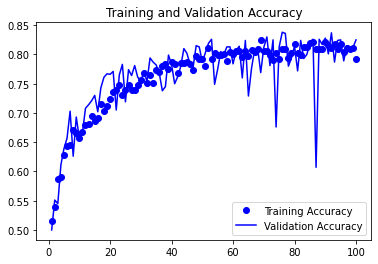

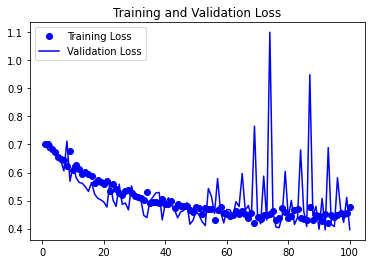

In [ ]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

# **Now I use the Pretrained model VGG16 and do features Extraction and Fine Tuning.**
## **VGG16 is trained on imagenet dataset.**

## **Features Extraction**

In [3]:
from keras.applications import vgg16

conv_base = vgg16.VGG16(weights = "imagenet",
                  include_top = False,
                  input_shape = (150,150,3))

# We do not use the dense layer (include_top = False) because vgg16 dense layer has 100 classes but we need only 2 class (cats and dogs)

58900480/58889256 [==============================] - 1s 0us/step


## Now we have two ways to use the Conv_base.
1. we save the output from Conv_base into numpy array and then pass this output to any dense network to get our output. That is a cheap way but we are unable to  use data augmentation in that case.
2. we bing a dense layer with the Conv_base and use data augmentation with that but is an expensive way of training a pretrained model.

# **First Way**

In [4]:
# Extracting features using pretrained Conv_base
import numpy as np


datagen = ImageDataGenerator(rescale = (1./255))
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape = (sample_count, 4, 4, 512))  #shape is 4,4,512 because conv_base last layer outputs this shape
  labels = np.zeros(shape = (sample_count,))
  generator = datagen.flow_from_directory(
      directory,
      target_size = (150,150),
      batch_size = batch_size,
      class_mode = "binary"
  )
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[ i * batch_size : (i+1) * batch_size] = features_batch
    labels[ i * batch_size : (i+1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
    return features, labels

In [8]:
train_feature, train_labels = extract_features(train_dir, 2000)
validation_feature, validation_labels = extract_features(validation_dir, 1000)
test_feature, test_labels = extract_features(test_dir, 1000)

NameError: ignored

In [ ]:
# Now we have train, test and validation features in shape like (sample_count, 4, 4, 512)
# So we must have to flatten them to feed them to dense layer

train_features = np.reshape(train_feature, (2000, 4*4*512))
validation_features =  np.reshape(validation_feature, (1000, 4*4*512))
test_features = np.reshape(test_feature, (1000, 4*4*512))

In [ ]:
#from tensorflow.keras import models, layers, optimizers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation= "relu", input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation= "sigmoid"))

In [ ]:
model.compile(optimizer= optimizers.RMSprop(learning_rate=2e-5),
              loss = "binary_crossentropy",
              metrics= ["acc"])

In [ ]:
history = model.fit(
    train_features,
    train_labels,
    epochs = 30,
    batch_size = 20,
    validation_data = (validation_features, validation_labels)
)

Epoch 1/30
100/100 [==============================] - 3s 24ms/step - loss: 0.6922 - acc: 0.9930 - val_loss: 0.6871 - val_acc: 0.9910
Epoch 2/30
100/100 [==============================] - 2s 22ms/step - loss: 0.6850 - acc: 0.9940 - val_loss: 0.6802 - val_acc: 0.9890
Epoch 3/30
100/100 [==============================] - 2s 22ms/step - loss: 0.6728 - acc: 0.9975 - val_loss: 0.6721 - val_acc: 0.9900
Epoch 4/30
100/100 [==============================] - 2s 22ms/step - loss: 0.6649 - acc: 0.9980 - val_loss: 0.6650 - val_acc: 0.9900
Epoch 5/30
100/100 [==============================] - 2s 22ms/step - loss: 0.6561 - acc: 0.9980 - val_loss: 0.6560 - val_acc: 0.9910
Epoch 6/30
100/100 [==============================] - 2s 22ms/step - loss: 0.6473 - acc: 0.9985 - val_loss: 0.6465 - val_acc: 0.9920
Epoch 7/30
100/100 [==============================] - 2s 22ms/step - loss: 0.6384 - acc: 0.9990 - val_loss: 0.6378 - val_acc: 0.9920
Epoch 8/30
100/100 [==============================] - 2s 22ms/step - 

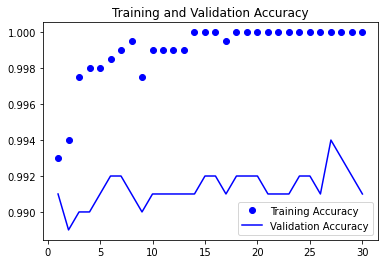

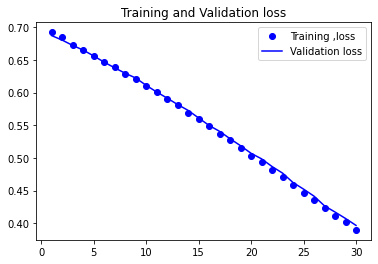

In [ ]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label= "Training Accuracy")
plt.plot(epochs, val_acc, "b", label= "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label= "Training ,loss")
plt.plot(epochs, val_loss, "b", label= "Validation loss")
plt.title("Training and Validation loss")
plt.legend()

plt.show()

## **Now we have good accuracy but still our model is overfitting. To deal with that case we need data augmentation**

# **Second Way**

In [9]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
 print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [ ]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 32s 313ms/step - loss: 0.5738 - acc: 0.7140 - val_loss: 0.4715 - val_acc: 0.7880
Epoch 2/30
100/100 [==============================] - 31s 307ms/step - loss: 0.4678 - acc: 0.8010 - val_loss: 0.3787 - val_acc: 0.8330
Epoch 3/30
100/100 [==============================] - 31s 307ms/step - loss: 0.4248 - acc: 0.8125 - val_loss: 0.3410 - val_acc: 0.8540
Epoch 4/30
100/100 [==============================] - 31s 308ms/step - loss: 0.4054 - acc: 0.8195 - val_loss: 0.3306 - val_acc: 0.8540
Epoch 5/30
100/100 [==============================] - 31s 308ms/step - loss: 0.3819 - acc: 0.8425 - val_loss: 0.3236 - val_acc: 0.8520
Epoch 6/30
100/100 [==============================] - 31s 310ms/step - loss: 0.3831 - acc: 0.8375 - val_loss: 0.2999 - val_acc: 0.8650
Epoch 7/30
100/100 [==============================] - 31s 309ms/step - loss: 0.3601 - acc: 0.8475 - val_loss: 0.2872 - val_acc: 0.8820
Epoch 8/30
100/100 [==============================] - 3

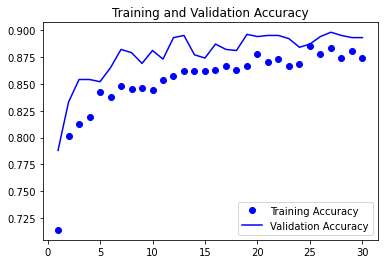

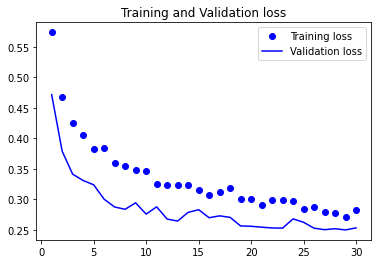

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label= "Training Accuracy")
plt.plot(epochs, val_acc, "b", label= "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label= "Training loss")
plt.plot(epochs, val_loss, "b", label= "Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.figure()
plt.show()

# **FINE TUNNING**

## Now we train some uper layers of the VGG16 to fine tune the model

In [10]:
conv_base.trainable = True

set_trainabale = False

for layer in conv_base.layers:
  if layer.name == "block5_conv1":
    set_trainabale = True
  if set_trainabale:
    layer.trainable = True
  else:
    layer.trainable = False

In [11]:
model.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(learning_rate = 1e-5),
              metrics = ["acc"])

In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 567s 5s/step - loss: 0.4130 - acc: 0.8160 - val_loss: 0.2738 - val_acc: 0.8880
Epoch 2/100
100/100 [==============================] - 21s 214ms/step - loss: 0.2045 - acc: 0.9210 - val_loss: 0.2754 - val_acc: 0.8810
Epoch 3/100
100/100 [==============================] - 21s 214ms/step - loss: 0.1367 - acc: 0.9490 - val_loss: 0.2370 - val_acc: 0.9020
Epoch 4/100
100/100 [==============================] - 21s 214ms/step - loss: 0.0899 - acc: 0.9735 - val_loss: 0.1918 - val_acc: 0.9180
Epoch 5/100
100/100 [==============================] - 21s 214ms/step - loss: 0.0590 - acc: 0.9855 - val_loss: 0.1803 - val_acc: 0.9260
Epoch 6/100
100/100 [==============================] - 22s 216ms/step - loss: 0.0371 - acc: 0.9925 - val_loss: 0.1840 - val_acc: 0.9260
Epoch 7/100
100/100 [==============================] - 21s 215ms/step - loss: 0.0215 - acc: 0.9975 - val_loss: 0.1895 - val_acc: 0.9290
Epoch 8/100
100/100 [=============================

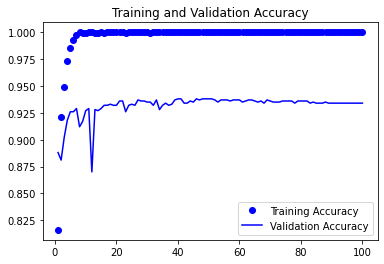

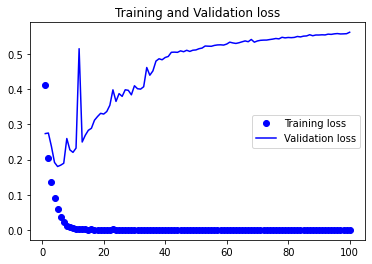

<Figure size 432x288 with 0 Axes>

In [13]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label= "Training Accuracy")
plt.plot(epochs, val_acc, "b", label= "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label= "Training loss")
plt.plot(epochs, val_loss, "b", label= "Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.figure()
plt.show()